### A script to run all types of input for this model

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Base paths for input and output
base_input_path = "./Training_data/input_data"
base_output_path = "./Training_data/output_data"

# Define methods and categories
methods = [ "RFE"]
# methods = ["Variance", "RFE"]

categories = ["B", "S", "D", "K"]

In [3]:
# Function to preprocess data
def preprocess_data(input_path, output_path):
    # Load input and output data
    input_data = pd.read_csv(input_path, header=None, skiprows=1)
    output_data = pd.read_csv(output_path, header=None, skiprows=1)

    # Normalize input data
    scaler = MinMaxScaler()
    input_data_normalized = scaler.fit_transform(input_data)

    # Handle NaN values
    imputer = SimpleImputer(strategy='mean')
    input_data_imputed = imputer.fit_transform(input_data_normalized)

    # One-hot encode output data
    output_labels = output_data[0].values
    output_data_encoded = pd.get_dummies(output_labels, dtype=np.float32).values

    # Reshape input data for CNN
    input_data_reshaped = input_data_imputed.reshape((input_data_imputed.shape[0], input_data_imputed.shape[1], 1))

    return input_data_reshaped, output_data_encoded

# Function to build the model
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Processing RFE -> B -> File 1


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> B -> File 1...
Epoch 1/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5419 - loss: 1.0334 - val_accuracy: 0.7736 - val_loss: 0.6064
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7541 - loss: 0.5900 - val_accuracy: 0.8068 - val_loss: 0.4920
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8075 - loss: 0.4775 - val_accuracy: 0.8327 - val_loss: 0.4237
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8371 - loss: 0.4161 - val_accuracy: 0.8342 - val_loss: 0.3949
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8646 - loss: 0.3577 - val_accuracy: 0.8544 - val_loss: 0.3667
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8710 - loss: 0.3213 - val_accuracy: 0.8760 - val_loss: 0.3206
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8825 - loss: 0.2985 - val_accuracy: 0.8745 - val_loss: 0.3489
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/

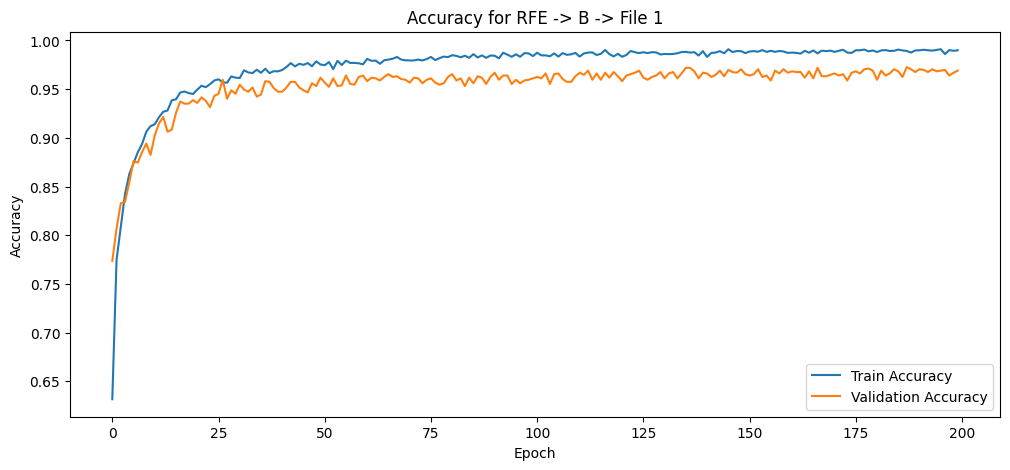

Processing RFE -> B -> File 2


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> B -> File 2...
Epoch 1/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5556 - loss: 1.0212 - val_accuracy: 0.7570 - val_loss: 0.6111
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7520 - loss: 0.5858 - val_accuracy: 0.7902 - val_loss: 0.4892
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7918 - loss: 0.4906 - val_accuracy: 0.8154 - val_loss: 0.4385
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8316 - loss: 0.4088 - val_accuracy: 0.8544 - val_loss: 0.3596
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8592 - loss: 0.3587 - val_accuracy: 0.8623 - val_loss: 0.3618
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8668 - loss: 0.3274 - val_accuracy: 0.8673 - val_loss: 0.3244
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8881 - loss: 0.2982 - val_accuracy: 0.8767 - val_loss: 0.3501
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - a

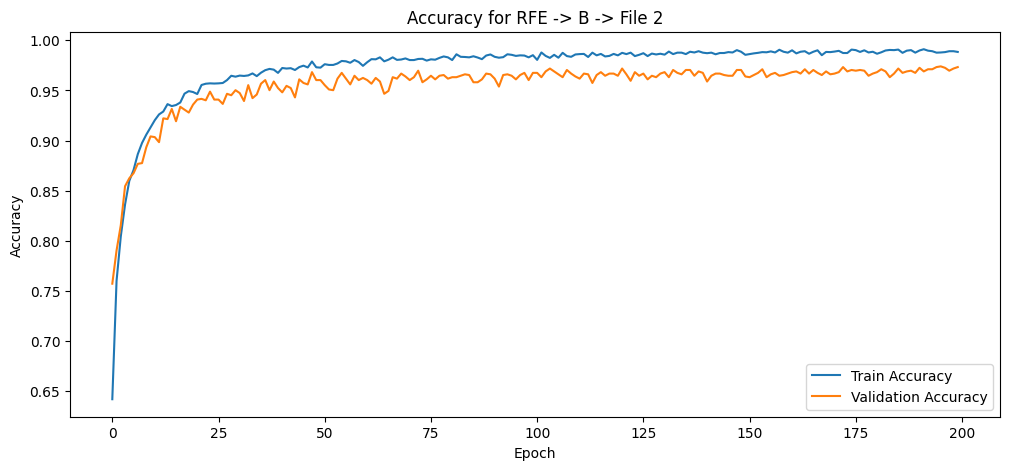

Processing RFE -> B -> File 3
Training model for RFE -> B -> File 3...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4827 - loss: 1.1143 - val_accuracy: 0.6907 - val_loss: 0.7096
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6979 - loss: 0.6991 - val_accuracy: 0.7743 - val_loss: 0.5622
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7615 - loss: 0.5852 - val_accuracy: 0.7967 - val_loss: 0.5234
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7988 - loss: 0.5066 - val_accuracy: 0.8356 - val_loss: 0.4507
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8120 - loss: 0.4599 - val_accuracy: 0.8255 - val_loss: 0.4462
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8426 - loss: 0.3932 - val_accuracy: 0.8435 - val_loss: 0.4113
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8505 - loss: 0.3817 - val_accuracy: 0.8818 - val_loss: 0.3422
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8804 - loss: 0.3185 - val_accuracy: 0.890

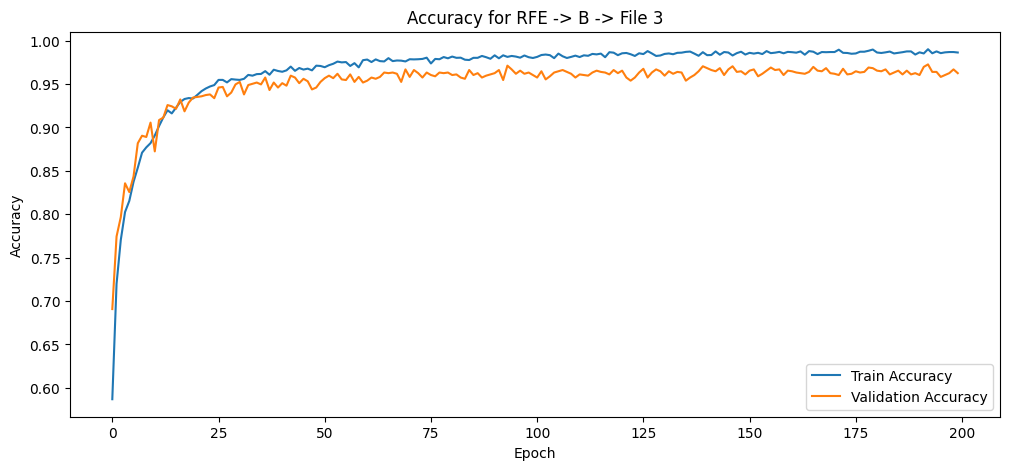

Processing RFE -> B -> File 4
Training model for RFE -> B -> File 4...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4380 - loss: 1.1736 - val_accuracy: 0.6417 - val_loss: 0.7584
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6834 - loss: 0.7155 - val_accuracy: 0.7469 - val_loss: 0.6008
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7247 - loss: 0.6264 - val_accuracy: 0.7484 - val_loss: 0.5853
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7466 - loss: 0.5935 - val_accuracy: 0.7808 - val_loss: 0.4964
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7747 - loss: 0.5307 - val_accuracy: 0.7952 - val_loss: 0.5055
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7874 - loss: 0.5020 - val_accuracy: 0.8125 - val_loss: 0.4666
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8085 - loss: 0.4716 - val_accuracy: 0.8198 - val_loss: 0.4390
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8135 - loss: 0.4465 - val_accuracy: 0.8190

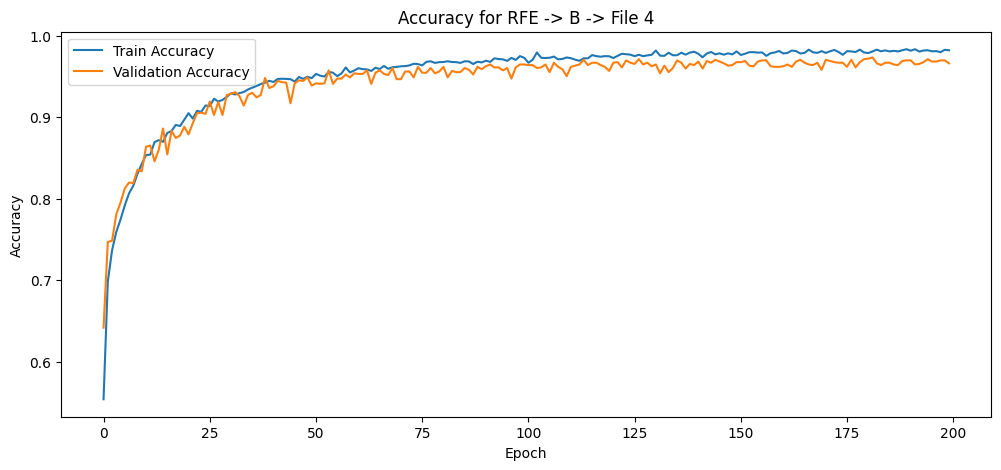

Processing RFE -> B -> File 5
Training model for RFE -> B -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4351 - loss: 1.2227 - val_accuracy: 0.6554 - val_loss: 0.8377
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6496 - loss: 0.7983 - val_accuracy: 0.7087 - val_loss: 0.6759
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6864 - loss: 0.7045 - val_accuracy: 0.7304 - val_loss: 0.6391
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7217 - loss: 0.6504 - val_accuracy: 0.7707 - val_loss: 0.5763
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7479 - loss: 0.6089 - val_accuracy: 0.7779 - val_loss: 0.5504
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7679 - loss: 0.5706 - val_accuracy: 0.8061 - val_loss: 0.5086
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7744 - loss: 0.5408 - val_accuracy: 0.8118 - val_loss: 0.5085
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7936 - loss: 0.5119 - val_accuracy: 0.8219

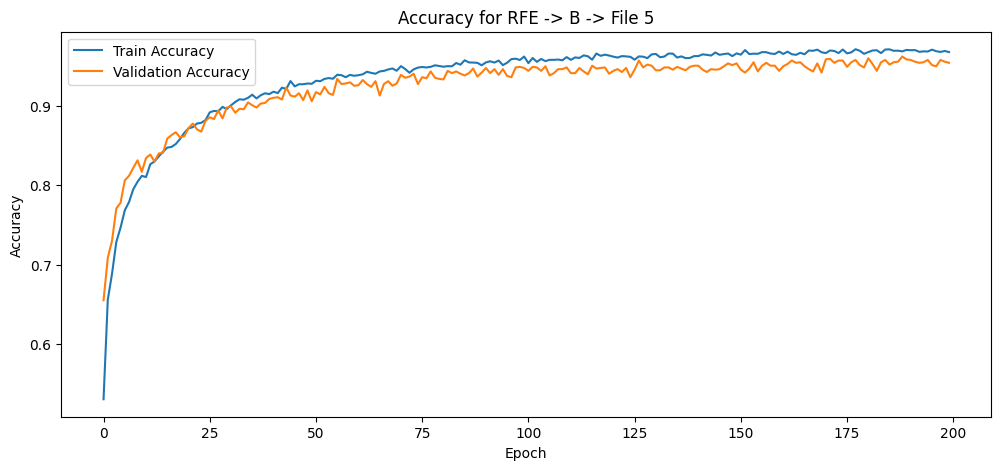

Processing RFE -> B -> File 6
Training model for RFE -> B -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3962 - loss: 1.2729 - val_accuracy: 0.5797 - val_loss: 0.9263
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5893 - loss: 0.9133 - val_accuracy: 0.6273 - val_loss: 0.7995
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6221 - loss: 0.8293 - val_accuracy: 0.6503 - val_loss: 0.7489
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6488 - loss: 0.7626 - val_accuracy: 0.6799 - val_loss: 0.7092
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6609 - loss: 0.7261 - val_accuracy: 0.6943 - val_loss: 0.6705
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6951 - loss: 0.6792 - val_accuracy: 0.7015 - val_loss: 0.6504
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6852 - loss: 0.6876 - val_accuracy: 0.7267 - val_loss: 0.6380
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7031 - loss: 0.6568 - val_accuracy: 0.7368

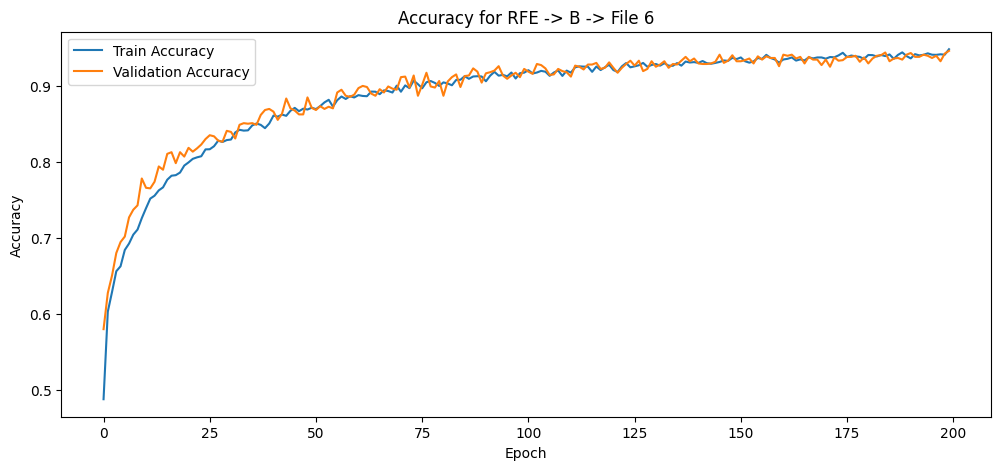

Processing RFE -> S -> File 1
Training model for RFE -> S -> File 1...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4937 - loss: 1.1445 - val_accuracy: 0.6345 - val_loss: 0.8799
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6533 - loss: 0.8469 - val_accuracy: 0.6643 - val_loss: 0.7902
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.7339 - val_accuracy: 0.6932 - val_loss: 0.7422
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7238 - loss: 0.6731 - val_accuracy: 0.6940 - val_loss: 0.7110
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7480 - loss: 0.6256 - val_accuracy: 0.7285 - val_loss: 0.6712
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7509 - loss: 0.5974 - val_accuracy: 0.7325 - val_loss: 0.6416
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7750 - loss: 0.5671 - val_accuracy: 0.7518 - val_loss: 0.5980
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7890 - loss: 0.5241 - val_accuracy: 0.744

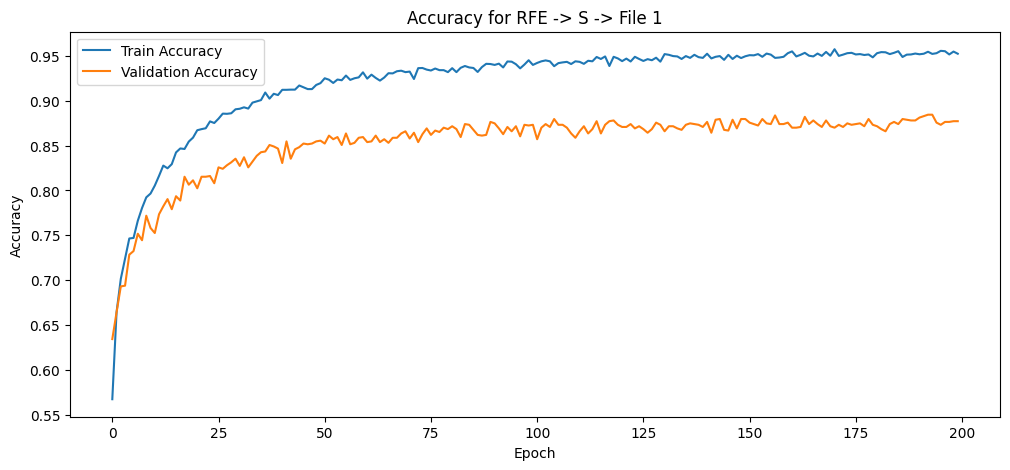

Processing RFE -> S -> File 2


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> S -> File 2...
Epoch 1/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4700 - loss: 1.1781 - val_accuracy: 0.6201 - val_loss: 0.9029
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6385 - loss: 0.8708 - val_accuracy: 0.6627 - val_loss: 0.8086
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6672 - loss: 0.7874 - val_accuracy: 0.6884 - val_loss: 0.7575
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7024 - loss: 0.7286 - val_accuracy: 0.6964 - val_loss: 0.7123
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7304 - loss: 0.6735 - val_accuracy: 0.7221 - val_loss: 0.6953
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7275 - loss: 0.6745 - val_accuracy: 0.7317 - val_loss: 0.6608
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7532 - loss: 0.6056 - val_accuracy: 0.7253 - val_loss: 0.6662
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/

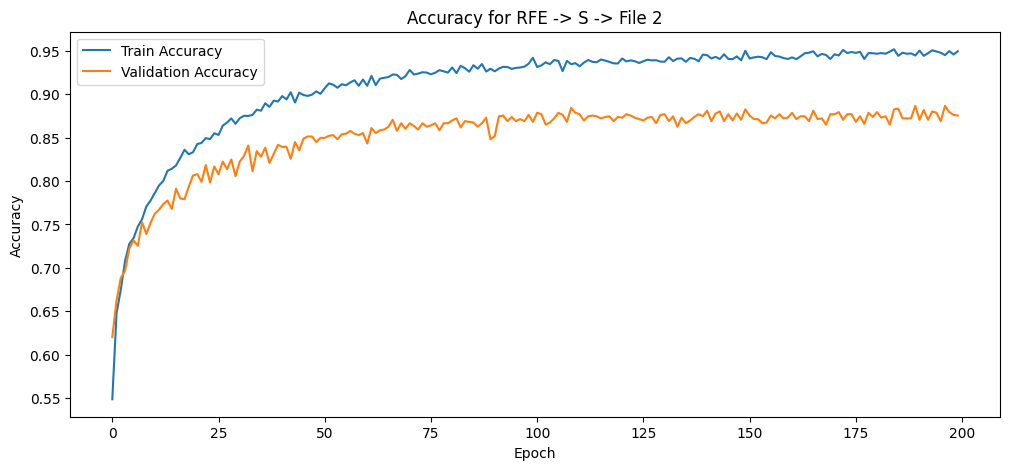

Processing RFE -> S -> File 3
Training model for RFE -> S -> File 3...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4448 - loss: 1.2203 - val_accuracy: 0.6056 - val_loss: 0.9720
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6321 - loss: 0.9130 - val_accuracy: 0.6474 - val_loss: 0.8621
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6508 - loss: 0.8258 - val_accuracy: 0.6779 - val_loss: 0.7636
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6939 - loss: 0.7559 - val_accuracy: 0.6570 - val_loss: 0.7791
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6991 - loss: 0.7276 - val_accuracy: 0.7028 - val_loss: 0.7413
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7317 - loss: 0.6692 - val_accuracy: 0.7277 - val_loss: 0.6756
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7447 - loss: 0.6419 - val_accuracy: 0.7133 - val_loss: 0.6791
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7507 - loss: 0.6398 - val_accuracy: 0.729

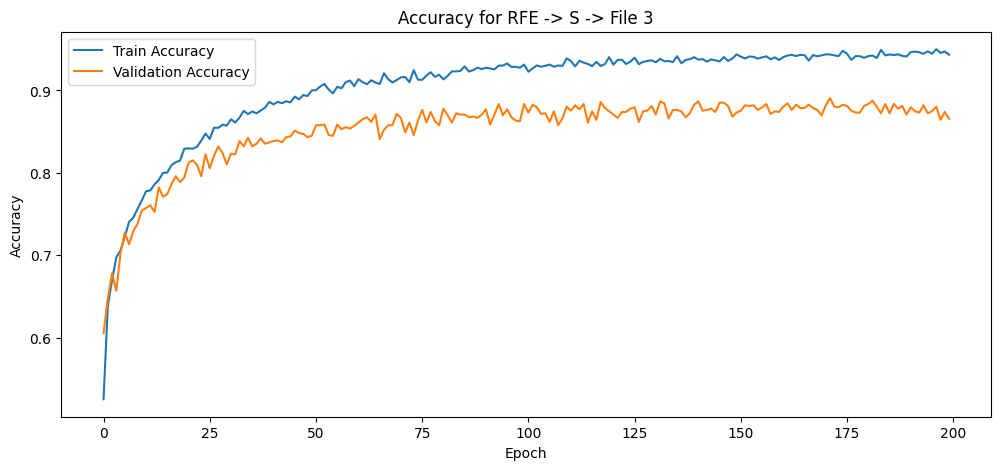

Processing RFE -> S -> File 4
Training model for RFE -> S -> File 4...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3784 - loss: 1.2881 - val_accuracy: 0.5920 - val_loss: 0.9900
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6147 - loss: 0.9603 - val_accuracy: 0.5944 - val_loss: 0.9373
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6238 - loss: 0.9151 - val_accuracy: 0.6353 - val_loss: 0.8367
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6767 - loss: 0.8132 - val_accuracy: 0.6586 - val_loss: 0.7918
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6776 - loss: 0.7785 - val_accuracy: 0.6859 - val_loss: 0.7687
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7140 - loss: 0.7315 - val_accuracy: 0.6956 - val_loss: 0.7269
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7004 - loss: 0.7367 - val_accuracy: 0.7060 - val_loss: 0.7066
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7085 - loss: 0.7097 - val_accuracy: 0.7116

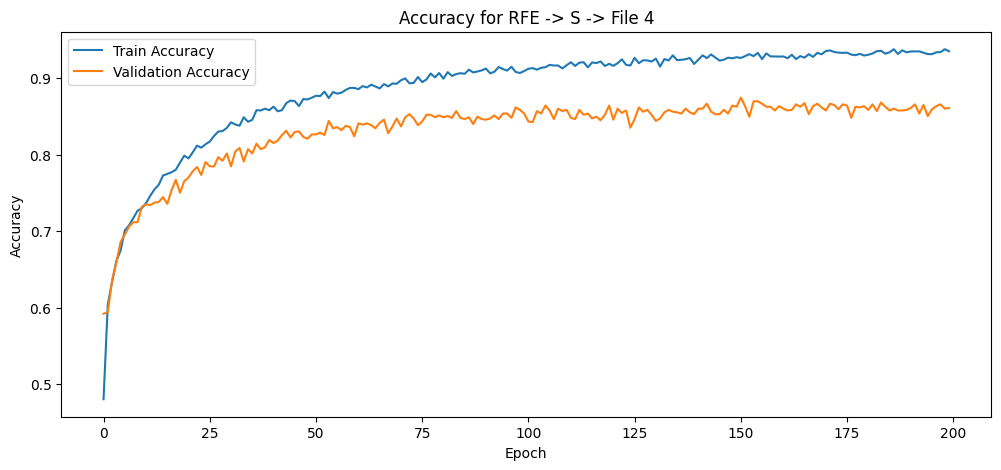

Processing RFE -> S -> File 5
Training model for RFE -> S -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3746 - loss: 1.3112 - val_accuracy: 0.5406 - val_loss: 1.0219
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5572 - loss: 1.0242 - val_accuracy: 0.5839 - val_loss: 0.9660
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5986 - loss: 0.9505 - val_accuracy: 0.6088 - val_loss: 0.9067
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6159 - loss: 0.9145 - val_accuracy: 0.6209 - val_loss: 0.8786
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6347 - loss: 0.8630 - val_accuracy: 0.6361 - val_loss: 0.8375
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6403 - loss: 0.8456 - val_accuracy: 0.6369 - val_loss: 0.8189
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6547 - loss: 0.8233 - val_accuracy: 0.6458 - val_loss: 0.8060
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6616 - loss: 0.8128 - val_accuracy: 0.6514

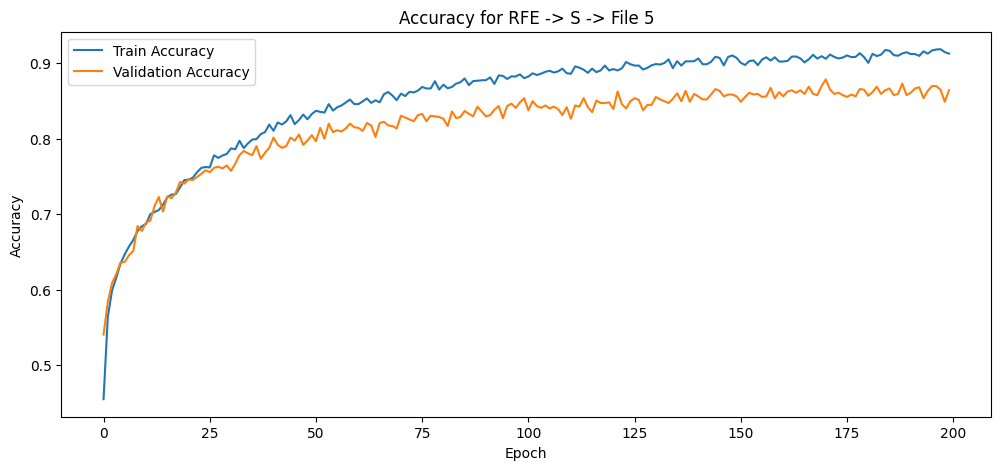

Processing RFE -> S -> File 6
Training model for RFE -> S -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3201 - loss: 1.3485 - val_accuracy: 0.5438 - val_loss: 1.1026
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5428 - loss: 1.1132 - val_accuracy: 0.5711 - val_loss: 1.0435
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5690 - loss: 1.0462 - val_accuracy: 0.5847 - val_loss: 0.9653
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5784 - loss: 0.9910 - val_accuracy: 0.6080 - val_loss: 0.9225
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5975 - loss: 0.9417 - val_accuracy: 0.6016 - val_loss: 0.9117
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6085 - loss: 0.9199 - val_accuracy: 0.6209 - val_loss: 0.8769
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6229 - loss: 0.8903 - val_accuracy: 0.6225 - val_loss: 0.8637
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6307 - loss: 0.8795 - val_accuracy: 0.6353

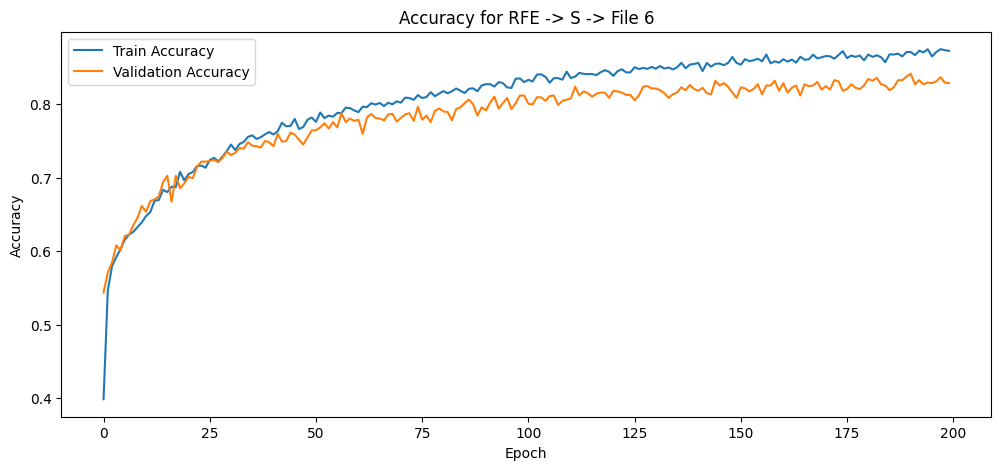

Processing RFE -> D -> File 1
Training model for RFE -> D -> File 1...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6293 - loss: 0.8557 - val_accuracy: 0.7977 - val_loss: 0.5021
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7964 - loss: 0.4851 - val_accuracy: 0.8399 - val_loss: 0.3789
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4064 - val_accuracy: 0.8577 - val_loss: 0.3416
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8477 - loss: 0.3720 - val_accuracy: 0.8511 - val_loss: 0.3431
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8568 - loss: 0.3608 - val_accuracy: 0.8825 - val_loss: 0.3076
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8776 - loss: 0.3081 - val_accuracy: 0.8804 - val_loss: 0.2860
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8842 - loss: 0.2896 - val_accuracy: 0.8920 - val_loss: 0.2865
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8961 - loss: 0.2794 - val_accuracy: 0.8953

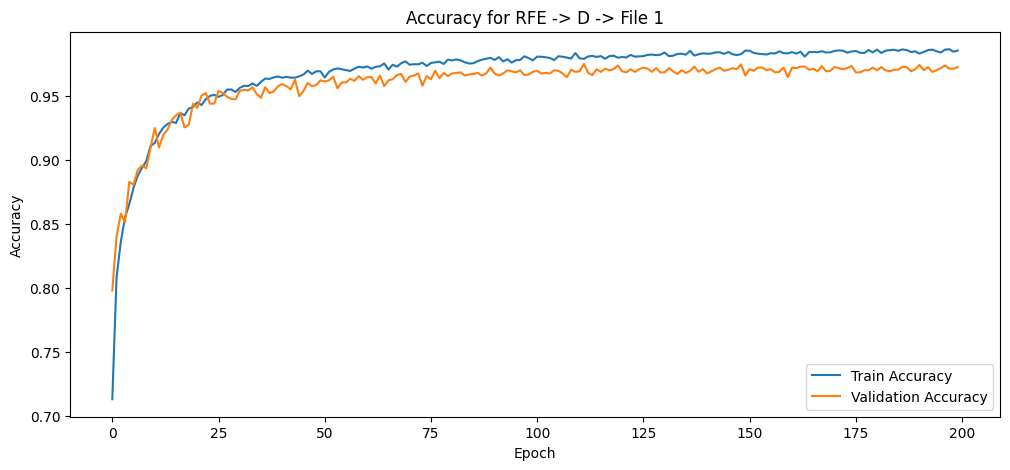

Processing RFE -> D -> File 2


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> D -> File 2...
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6205 - loss: 0.8967 - val_accuracy: 0.7811 - val_loss: 0.4996
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7952 - loss: 0.4932 - val_accuracy: 0.8097 - val_loss: 0.4623
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8253 - loss: 0.4292 - val_accuracy: 0.8237 - val_loss: 0.4024
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8468 - loss: 0.3822 - val_accuracy: 0.8577 - val_loss: 0.3386
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8550 - loss: 0.3508 - val_accuracy: 0.8854 - val_loss: 0.3083
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8783 - loss: 0.3156 - val_accuracy: 0.8887 - val_loss: 0.2788
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8821 - loss: 0.3077 - val_accuracy: 0.8883 - val_loss: 0.2772
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - 

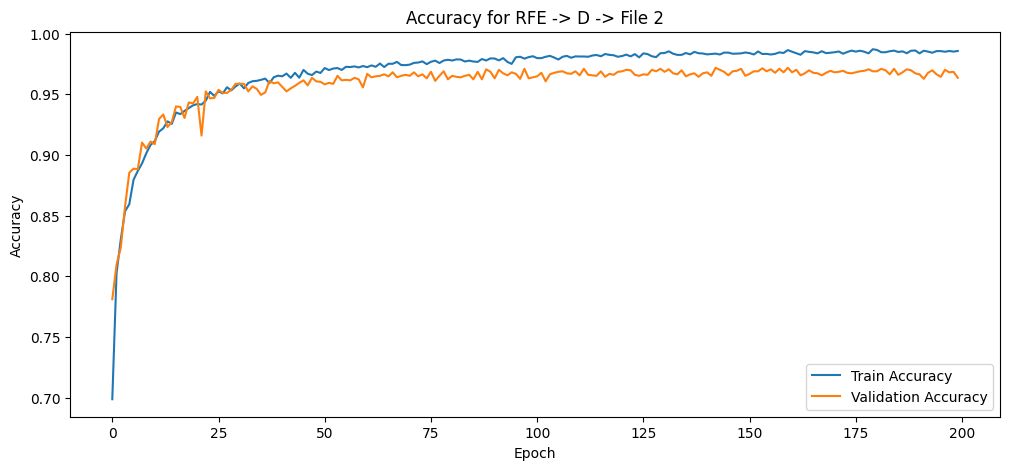

Processing RFE -> D -> File 3


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> D -> File 3...
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5981 - loss: 0.9272 - val_accuracy: 0.7609 - val_loss: 0.5746
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7859 - loss: 0.5292 - val_accuracy: 0.8229 - val_loss: 0.4345
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8161 - loss: 0.4626 - val_accuracy: 0.8291 - val_loss: 0.4188
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8388 - loss: 0.4064 - val_accuracy: 0.8672 - val_loss: 0.3452
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8548 - loss: 0.3771 - val_accuracy: 0.8568 - val_loss: 0.3423
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8559 - loss: 0.3606 - val_accuracy: 0.8697 - val_loss: 0.3251
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8759 - loss: 0.3423 - val_accuracy: 0.8895 - val_loss: 0.3084
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - 

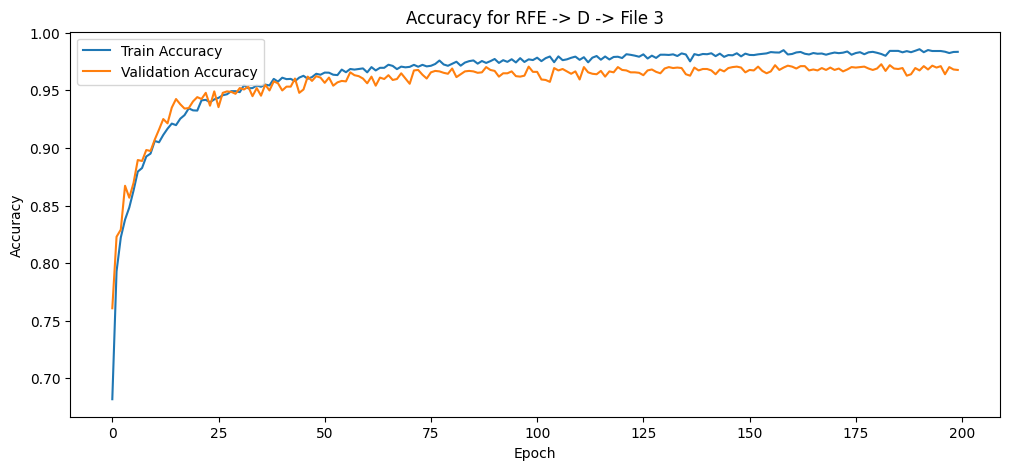

Processing RFE -> D -> File 4


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> D -> File 4...
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5367 - loss: 1.0523 - val_accuracy: 0.7642 - val_loss: 0.5753
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7632 - loss: 0.5729 - val_accuracy: 0.8060 - val_loss: 0.4848
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7909 - loss: 0.5063 - val_accuracy: 0.8184 - val_loss: 0.4501
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8040 - loss: 0.4624 - val_accuracy: 0.8279 - val_loss: 0.4330
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8153 - loss: 0.4481 - val_accuracy: 0.8341 - val_loss: 0.3979
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8345 - loss: 0.4112 - val_accuracy: 0.8548 - val_loss: 0.3617
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8435 - loss: 0.3963 - val_accuracy: 0.8651 - val_loss: 0.3552
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - a

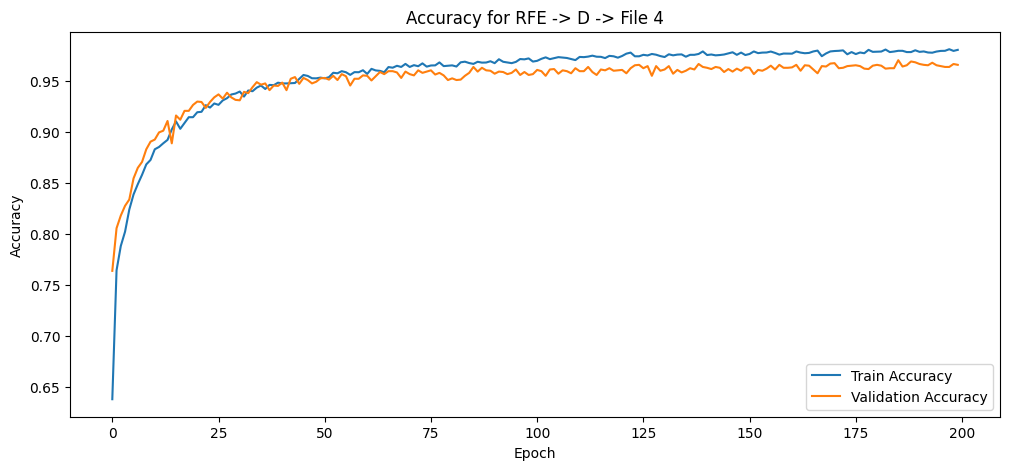

Processing RFE -> D -> File 5
Training model for RFE -> D -> File 5...


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4914 - loss: 1.1177 - val_accuracy: 0.7265 - val_loss: 0.6543
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7180 - loss: 0.6668 - val_accuracy: 0.7675 - val_loss: 0.5479
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7656 - loss: 0.5547 - val_accuracy: 0.8002 - val_loss: 0.4874
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7867 - loss: 0.5153 - val_accuracy: 0.8010 - val_loss: 0.4707
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8022 - loss: 0.4835 - val_accuracy: 0.8200 - val_loss: 0.4356
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8161 - loss: 0.4606 - val_accuracy: 0.8440 - val_loss: 0.3916
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8251 - loss: 0.4297 - val_accuracy: 0.8490 - val_loss: 0.3846
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8344 - loss: 0.4059 - val_accu

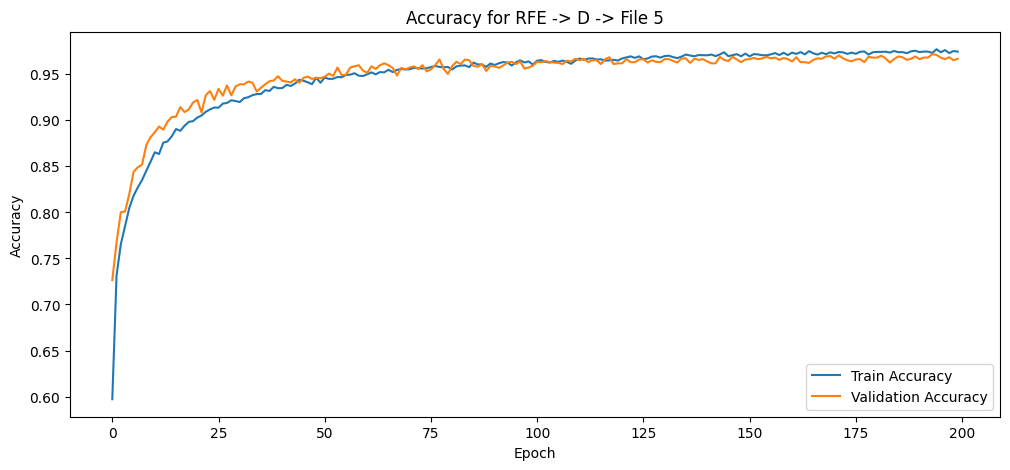

Processing RFE -> D -> File 6


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> D -> File 6...
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4612 - loss: 1.1812 - val_accuracy: 0.6860 - val_loss: 0.7370
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6855 - loss: 0.7500 - val_accuracy: 0.7646 - val_loss: 0.5970
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7354 - loss: 0.6527 - val_accuracy: 0.7613 - val_loss: 0.5428
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7444 - loss: 0.6110 - val_accuracy: 0.7733 - val_loss: 0.5278
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7700 - loss: 0.5589 - val_accuracy: 0.7973 - val_loss: 0.4878
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7819 - loss: 0.5307 - val_accuracy: 0.8089 - val_loss: 0.4789
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7919 - loss: 0.5049 - val_accuracy: 0.8159 - val_loss: 0.4612
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - a

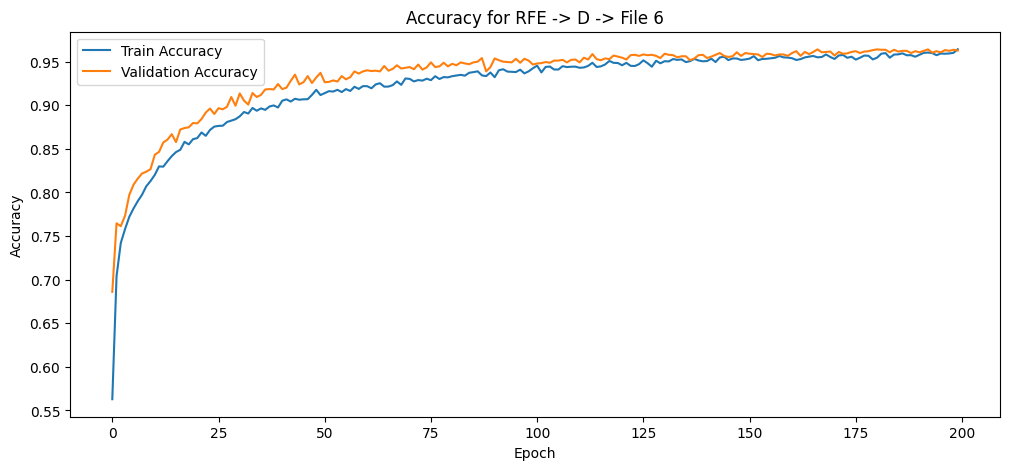

Processing RFE -> K -> File 1
Training model for RFE -> K -> File 1...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.3833 - loss: 1.3079 - val_accuracy: 0.5085 - val_loss: 1.0898
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5635 - loss: 1.0395 - val_accuracy: 0.6234 - val_loss: 0.8690
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6436 - loss: 0.8375 - val_accuracy: 0.6593 - val_loss: 0.8011
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6903 - loss: 0.7703 - val_accuracy: 0.6833 - val_loss: 0.7737
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7259 - loss: 0.6839 - val_accuracy: 0.7073 - val_loss: 0.6932
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7188 - loss: 0.6985 - val_accuracy: 0.7383 - val_loss: 0.6662
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7485 - loss: 0.6481 - val_accuracy: 0.7393 - val_loss: 0.6440
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7460 - loss: 0.6208 - val_accuracy

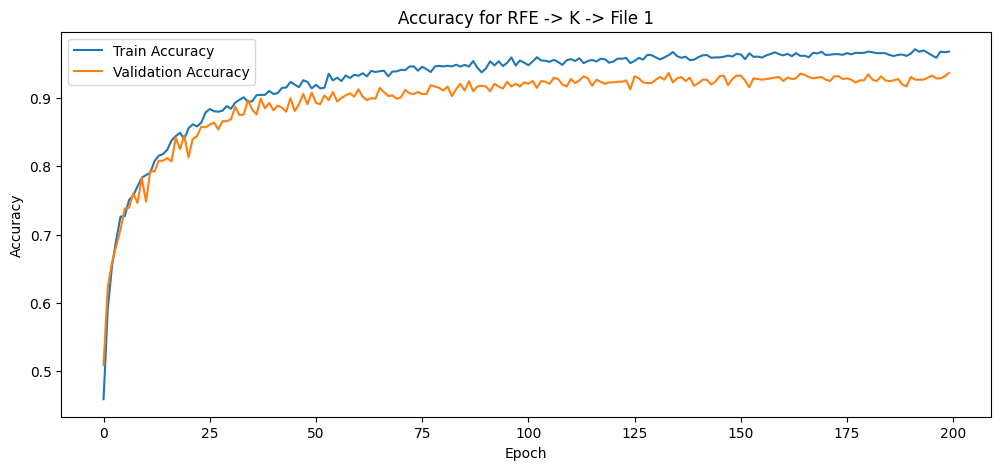

Processing RFE -> K -> File 2
Training model for RFE -> K -> File 2...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3612 - loss: 1.3365 - val_accuracy: 0.4965 - val_loss: 1.1177
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5541 - loss: 1.0455 - val_accuracy: 0.5964 - val_loss: 0.9241
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6234 - loss: 0.8934 - val_accuracy: 0.6573 - val_loss: 0.8370
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6673 - loss: 0.8275 - val_accuracy: 0.6543 - val_loss: 0.8165
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6808 - loss: 0.7817 - val_accuracy: 0.6823 - val_loss: 0.7630
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7159 - loss: 0.7059 - val_accuracy: 0.7013 - val_loss: 0.7306
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7257 - loss: 0.6908 - val_accuracy: 0.7183 - val_loss: 0.6821
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7474 - loss: 0.6298 - val_accuracy

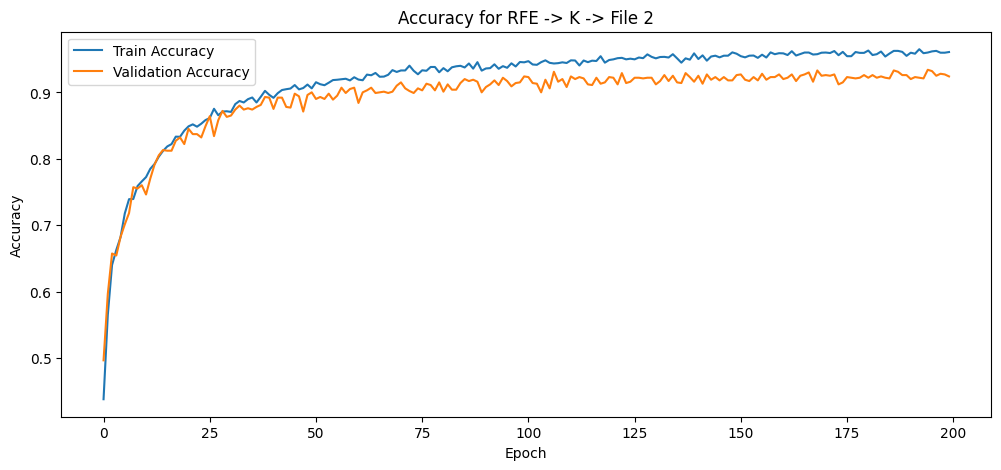

Processing RFE -> K -> File 3


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> K -> File 3...
Epoch 1/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3104 - loss: 1.3607 - val_accuracy: 0.4865 - val_loss: 1.2025
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5050 - loss: 1.1616 - val_accuracy: 0.5554 - val_loss: 1.0518
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5683 - loss: 1.0145 - val_accuracy: 0.5964 - val_loss: 0.9428
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6065 - loss: 0.9257 - val_accuracy: 0.6394 - val_loss: 0.8363
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6358 - loss: 0.8619 - val_accuracy: 0.6753 - val_loss: 0.7972
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6693 - loss: 0.7893 - val_accuracy: 0.6703 - val_loss: 0.7694
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6896 - loss: 0.7524 - val_accuracy: 0.6883 - val_loss: 0.7266
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/

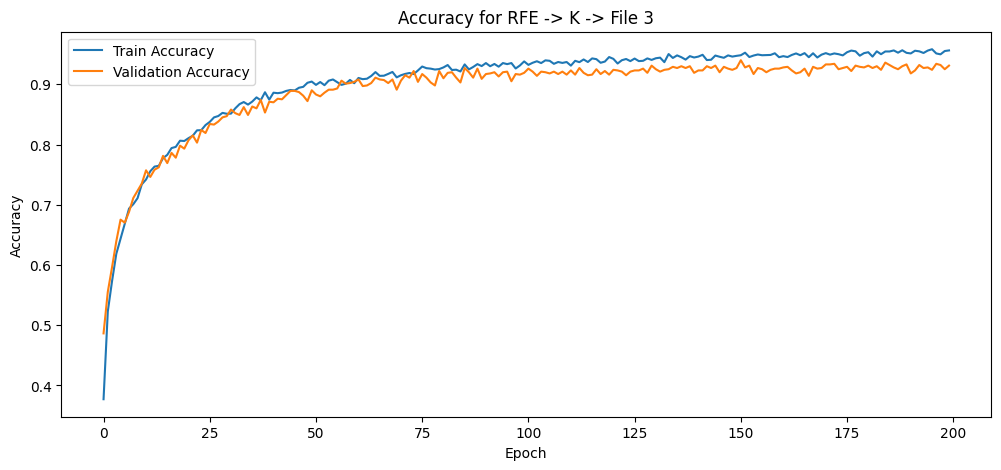

Processing RFE -> K -> File 4


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for RFE -> K -> File 4...
Epoch 1/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2962 - loss: 1.3698 - val_accuracy: 0.4486 - val_loss: 1.2298
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4581 - loss: 1.2074 - val_accuracy: 0.5375 - val_loss: 1.0766
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5464 - loss: 1.0573 - val_accuracy: 0.5744 - val_loss: 0.9695
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5638 - loss: 1.0058 - val_accuracy: 0.6174 - val_loss: 0.9000
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6112 - loss: 0.9225 - val_accuracy: 0.6294 - val_loss: 0.8544
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6460 - loss: 0.8485 - val_accuracy: 0.6454 - val_loss: 0.8408
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6724 - loss: 0.8157 - val_accuracy: 0.6913 - val_loss: 0.7940
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - 

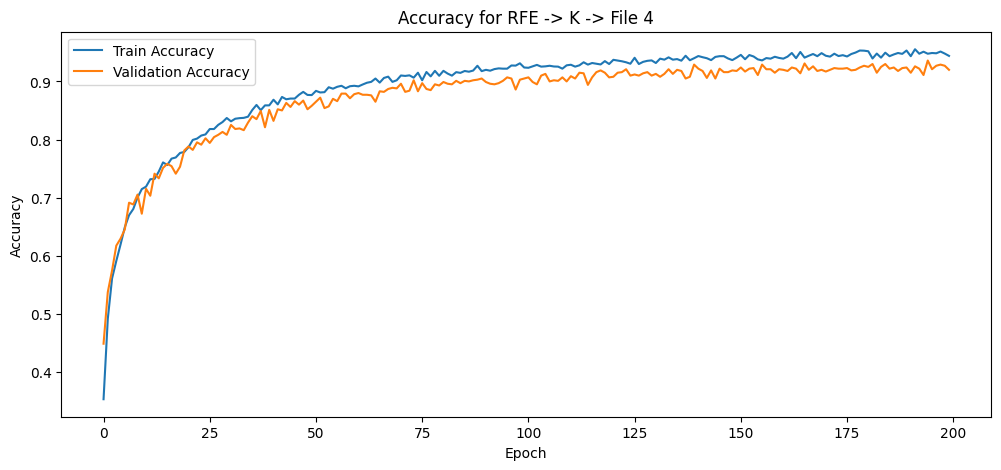

Processing RFE -> K -> File 5
Training model for RFE -> K -> File 5...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3042 - loss: 1.3673 - val_accuracy: 0.4925 - val_loss: 1.2340
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4719 - loss: 1.2091 - val_accuracy: 0.5125 - val_loss: 1.1171
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5179 - loss: 1.1171 - val_accuracy: 0.5495 - val_loss: 1.0213
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5394 - loss: 1.0490 - val_accuracy: 0.5844 - val_loss: 0.9684
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5737 - loss: 0.9809 - val_accuracy: 0.5954 - val_loss: 0.9156
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5908 - loss: 0.9436 - val_accuracy: 0.6144 - val_loss: 0.9030
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6047 - loss: 0.9105 - val_accuracy: 0.6314 - val_loss: 0.8587
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6202 - loss: 0.8829 - val_accuracy: 0.659

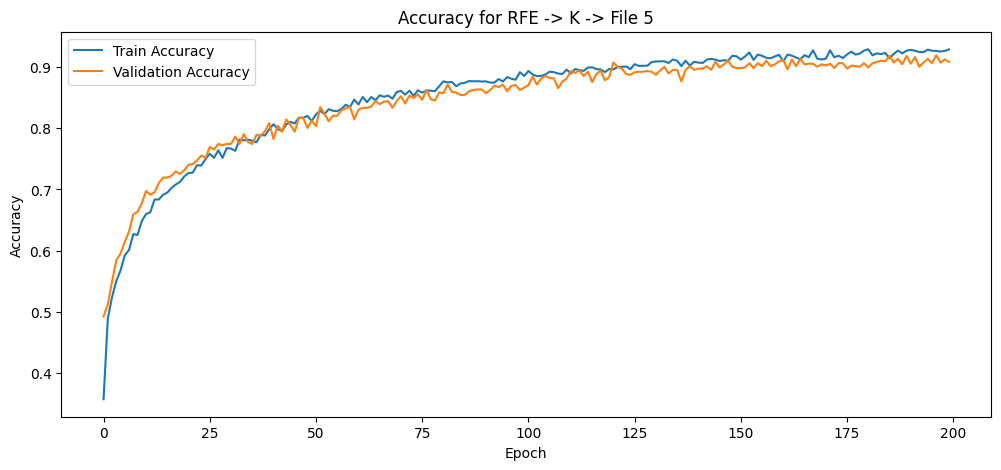

Processing RFE -> K -> File 6
Training model for RFE -> K -> File 6...
Epoch 1/200


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2847 - loss: 1.3780 - val_accuracy: 0.4026 - val_loss: 1.3143
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4295 - loss: 1.2784 - val_accuracy: 0.4216 - val_loss: 1.2610
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4579 - loss: 1.2220 - val_accuracy: 0.5015 - val_loss: 1.1441
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4984 - loss: 1.1398 - val_accuracy: 0.5185 - val_loss: 1.0812
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5273 - loss: 1.0677 - val_accuracy: 0.5574 - val_loss: 1.0223
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5454 - loss: 1.0410 - val_accuracy: 0.5544 - val_loss: 0.9924
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5624 - loss: 1.0023 - val_accuracy: 0.5664 - val_loss: 0.9806
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5820 - loss: 0.9675 - val_accuracy: 0.590

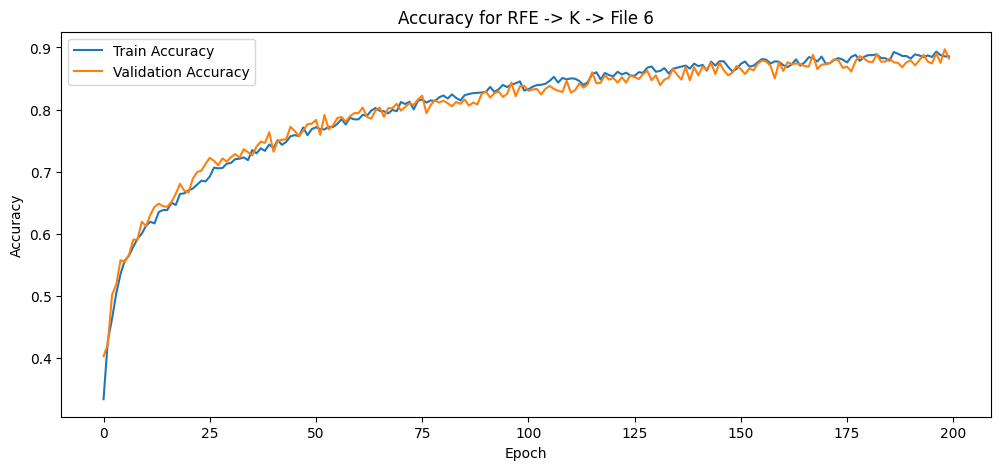

Model training and evaluation completed. Results saved to 'model_training_results.csv'.


In [4]:
# Initialize a list to store results
results = []

# Loop through methods, categories, and input files
for method in methods:
    for category in categories:
        output_file = os.path.join(base_output_path, f"output_cathepsin_{category}.csv")
        
        # Process all 3 input files for each category
        for file_index in range(1, 7):
            input_file = os.path.join(
                base_input_path, method, category, f"reduced_desc_{method}_{category}_{file_index}.csv"
            )
            
            print(f"Processing {method} -> {category} -> File {file_index}")

            # Preprocess the data
            input_data, output_data = preprocess_data(input_file, output_file)

            # Apply SMOTE to balance classes
            smote = SMOTE(sampling_strategy='auto', random_state=42)
            X_resampled, y_resampled = smote.fit_resample(
                input_data.reshape(input_data.shape[0], -1), output_data
            )
            X_resampled = X_resampled.reshape((X_resampled.shape[0], input_data.shape[1], 1))

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled, test_size=0.2, random_state=42
            )

            # Build the model
            model = build_model(X_train.shape[1:], num_classes=output_data.shape[1])

            # Early stopping callback
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            print(f"Training model for {method} -> {category} -> File {file_index}...")
            history = model.fit(
                X_train, y_train, 
                epochs=200, 
                batch_size=32, 
                validation_data=(X_test, y_test), 
                # callbacks=[early_stopping],
                verbose=1
            )

            # Evaluate the model
            test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
            print(f"Test accuracy for {method} -> {category} -> File {file_index}: {test_acc}")

            # Predict and generate classification report
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_classes, output_dict=True)
            print(f"Classification Report for {method} -> {category} -> File {file_index}:")
            print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

            # Save result details for each iteration
            results.append({
                "Method": method,
                "Category": category,
                "File_Index": file_index,
                "Test_Accuracy": test_acc,
                "Precision": classification_rep['weighted avg']['precision'],
                "Recall": classification_rep['weighted avg']['recall'],
                "F1-Score": classification_rep['weighted avg']['f1-score']
            })

            # Plot training history
            plt.figure(figsize=(12, 5))
            plt.plot(history.history['accuracy'], label='Train Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title(f"Accuracy for {method} -> {category} -> File {file_index}")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.show()

# Create a DataFrame to store all results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("Final_results_RFE.csv", index=False)

print("Model training and evaluation completed. Results saved to 'model_training_results.csv'.")
